<a href="https://colab.research.google.com/github/yk-Jeong/Codestates_Project/blob/main/2ndProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 import 및 구글 드라이브 연동 

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import pandas_profiling

In [3]:
pip install pandas-profiling==2.11.0 --upgrade

  Using cached matplotlib-3.4.3-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


lib for visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install pdpbox

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.11.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
pip install shap

In [7]:
import shap
from pdpbox.pdp import pdp_isolate, pdp_plot #단일 feature
from pdpbox.pdp import pdp_interact, pdp_interact_plot #복수 features

lib for modeling

In [8]:
#data split
from sklearn.model_selection import train_test_split

In [9]:
pip install --upgrade category_encoders

In [10]:
#ordinal-encoder, target encoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder

In [11]:
#make pipeline
from sklearn.pipeline import make_pipeline

In [12]:
#단순선형회귀
from sklearn.linear_model import LinearRegression

#RF회귀
from sklearn.ensemble import RandomForestRegressor

In [13]:
#로그변환을 위한 lib
from sklearn.compose import TransformedTargetRegressor

#표준화 
from sklearn.preprocessing import StandardScaler

#결측치 처리
from sklearn.impute import SimpleImputer

In [14]:
#하이퍼파라미터 탐색을 위한 RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#gradient boosting model
from xgboost import XGBRegressor

In [15]:
from scipy.stats import randint, uniform

평가지표를 위한 lib 

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

### 데이터 로드
Kaggle의 Saptarshi Ghosh가 제공하는 Meal delivery company dataset(2018.12.)를 준비하였음 (https://www.kaggle.com/ghoshsaptarshi/av-genpact-hack-dec2018)

In [17]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sprint chl./S2/meal_dataset/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sprint chl./S2/meal_dataset/train.csv')
meal_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sprint chl./S2/meal_dataset/meal_info.csv')
fulfilment_center_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sprint chl./S2/meal_dataset/fulfilment_center_info.csv')

### 데이터 확인

In [18]:
train.head(), test.head()

(        id  week  ...  homepage_featured  num_orders
 0  1379560     1  ...                  0         177
 1  1466964     1  ...                  0         270
 2  1346989     1  ...                  0         189
 3  1338232     1  ...                  0          54
 4  1448490     1  ...                  0          40
 
 [5 rows x 9 columns],
         id  week  ...  emailer_for_promotion  homepage_featured
 0  1028232   146  ...                      0                  0
 1  1127204   146  ...                      0                  0
 2  1212707   146  ...                      0                  0
 3  1082698   146  ...                      0                  0
 4  1400926   146  ...                      0                  0
 
 [5 rows x 8 columns])

In [19]:
fulfilment_center_info.head(),meal_info.head()

(   center_id  city_code  region_code center_type  op_area
 0         11        679           56      TYPE_A      3.7
 1         13        590           56      TYPE_B      6.7
 2        124        590           56      TYPE_C      4.0
 3         66        648           34      TYPE_A      4.1
 4         94        632           34      TYPE_C      3.6,
    meal_id   category cuisine
 0     1885  Beverages    Thai
 1     1993  Beverages    Thai
 2     2539  Beverages    Thai
 3     1248  Beverages  Indian
 4     2631  Beverages  Indian)

결측치 확인

In [20]:
train.isna().sum().sort_values(), test.isna().sum().sort_values()

(id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 num_orders               0
 dtype: int64, id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 dtype: int64)

In [21]:
fulfilment_center_info.isna().sum().sort_values(), meal_info.isna().sum().sort_values()

(center_id      0
 city_code      0
 region_code    0
 center_type    0
 op_area        0
 dtype: int64, meal_id     0
 category    0
 cuisine     0
 dtype: int64)

In [22]:
meal_info['meal_id'].unique()

array([1885, 1993, 2539, 1248, 2631, 1311, 1062, 1778, 1803, 1198, 2707,
       1847, 1438, 2494, 2760, 2490, 1109, 2290, 1525, 2704, 1878, 2640,
       2577, 1754, 1971, 2306, 2139, 2826, 2664, 2569, 1230, 1207, 2322,
       2492, 1216, 1727, 1902, 1247, 2304, 1543, 1770, 2126, 1558, 2581,
       1962, 1571, 2956, 2104, 2444, 2867, 1445])

In [23]:
meal_info['category'].unique()

array(['Beverages', 'Extras', 'Soup', 'Other Snacks', 'Salad',
       'Rice Bowl', 'Starters', 'Sandwich', 'Pasta', 'Desert', 'Biryani',
       'Pizza', 'Fish', 'Seafood'], dtype=object)

In [24]:
meal_info['cuisine'].unique() #Continental food = European food

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [25]:
test.shape, train.shape, fulfilment_center_info.shape, meal_info.shape

((32573, 8), (456548, 9), (77, 5), (51, 3))

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [27]:
pr = train.profile_report()
pr

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

target을 num_orders로 하는 회귀 문제로 가정하고, target의 분포를 확인해 봄

In [28]:
target = 'num_orders'

In [29]:
train[target].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

극단적으로 right-skewed함을 확인 

### Data Wrangling

#### 1. merge

In [30]:
len(train.meal_id.unique()) == len(meal_info)

True

meal_info.csv와 fulfilment_center_info를 train과 병합 

In [31]:
train = train.merge(meal_info, on='meal_id')
train = train.merge(fulfilment_center_info, on='center_id')

test set에도 같은 작업을 진행

In [32]:
test = test.merge(meal_info, on='meal_id')
test = test.merge(fulfilment_center_info, on='center_id')

#### 2. feature engineering

In [33]:
train

id  week  center_id  ...  region_code  center_type  op_area
0       1379560     1         55  ...           56       TYPE_C      2.0
1       1018704     2         55  ...           56       TYPE_C      2.0
2       1196273     3         55  ...           56       TYPE_C      2.0
3       1116527     4         55  ...           56       TYPE_C      2.0
4       1343872     5         55  ...           56       TYPE_C      2.0
...         ...   ...        ...  ...          ...          ...      ...
456543  1437396   141         61  ...           77       TYPE_A      4.5
456544  1060716   142         61  ...           77       TYPE_A      4.5
456545  1029231   143         61  ...           77       TYPE_A      4.5
456546  1141147   144         61  ...           77       TYPE_A      4.5
456547  1443704   145         61  ...           77       TYPE_A      4.5

[456548 rows x 15 columns]

컬럼 추가: `discount` (할인 여부를 Y, N으로 계산), `difference` (최종가와 기본가 간의 차액 계산)


def for feature engineering

In [34]:
def engineering(df):
  df = df.copy()
  
  #컬럼 추가: `discount` (할인 여부를 Y, N으로 계산), `difference` (최종가와 기본가 간의 차액 계산)
  df['discount'] = np.where(((df['checkout_price']-df['base_price']).values < 0), 1, 0)
  df['difference'] = (df['checkout_price']-df['base_price'])
  
  return df

In [35]:
engineering(train)

id  week  center_id  ...  op_area  discount  difference
0       1379560     1         55  ...      2.0         1      -15.46
1       1018704     2         55  ...      2.0         1      -16.46
2       1196273     3         55  ...      2.0         1       -1.00
3       1116527     4         55  ...      2.0         0        1.00
4       1343872     5         55  ...      2.0         1       -1.00
...         ...   ...        ...  ...      ...       ...         ...
456543  1437396   141         61  ...      4.5         1      -47.50
456544  1060716   142         61  ...      4.5         1       -1.00
456545  1029231   143         61  ...      4.5         0        2.00
456546  1141147   144         61  ...      4.5         0        1.00
456547  1443704   145         61  ...      4.5         1       -1.00

[456548 rows x 17 columns]

In [36]:
engineering(test)

id  week  center_id  ...  op_area  discount  difference
0      1028232   146         55  ...      2.0         1        -1.0
1      1262649   147         55  ...      2.0         0         0.0
2      1453211   149         55  ...      2.0         1        -1.0
3      1262599   150         55  ...      2.0         0         2.0
4      1495848   151         55  ...      2.0         0         1.0
...        ...   ...        ...  ...      ...       ...         ...
32568  1412025   146         61  ...      4.5         0         2.0
32569  1287019   147         61  ...      4.5         0         0.0
32570  1396176   149         61  ...      4.5         0         0.0
32571  1331977   150         61  ...      4.5         0         0.0
32572  1017414   152         61  ...      4.5         1        -1.0

[32573 rows x 16 columns]

#### 3. target 상위 5%를 제거

In [37]:
train[target] = train[train['num_orders'] < np.percentile(train['num_orders'], 95)]['num_orders']

In [38]:
train = train.dropna(axis=0)

In [39]:
train[target].describe()

count    433557.000000
mean        196.338947
std         191.384275
min          13.000000
25%          53.000000
50%         123.000000
75%         284.000000
max         877.000000
Name: num_orders, dtype: float64

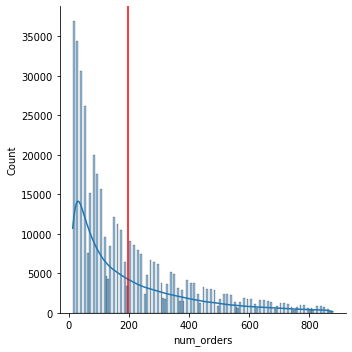

In [40]:
#이상치 제거 후의 분포 확인
sns.displot(train[target], kde=True);
plt.axvline(196, color='red')


로그 변환

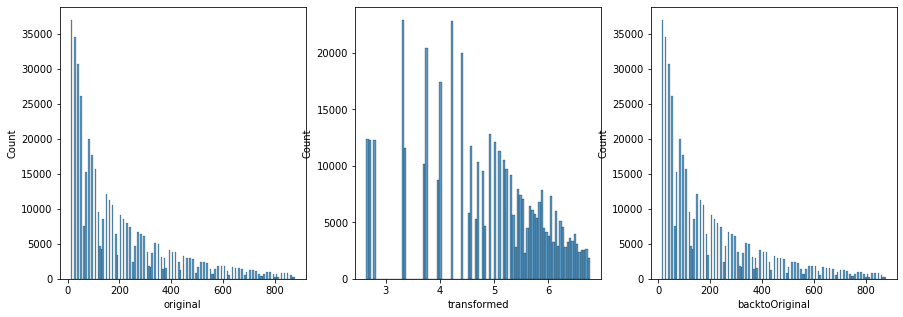

In [41]:
plots = pd.DataFrame()
plots['original'] = train[target]
plots['transformed'] = np.log1p(train[target])
plots['backtoOriginal'] = np.expm1(np.log1p(train[target]))

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.histplot(plots['original'], ax = ax[0]);
sns.histplot(plots['transformed'], ax = ax[1]);
sns.histplot(plots['backtoOriginal'], ax = ax[2]);

### Data Split
hold-out validation: train data set을 valid/train으로 임의로 분리


In [42]:
target = 'num_orders'
data = train[train[target].notna()]

train, val = train_test_split(data, test_size = 0.2, random_state = 2)
features = train.drop(columns = [target]).columns

In [43]:
X_test = test

In [44]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

*stratify = target을 쓸 수 없었던 이유가 무엇일까?*

참고: https://stackoverflow.com/questions/43179429/scikit-learn-error-the-least-populated-class-in-y-has-only-1-member

In [45]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((346845, 14), (86712, 14), (346845,), (86712,))

k-fold cross validation

In [46]:
pipe = make_pipeline(
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(max_depth = 10, n_jobs=-1, random_state=2)
)

k = 3

scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [71.66696109 71.99252591 71.61012067]


In [47]:
-scores.mean(), scores.std()

(71.75653589126183, 0.16847586252360416)

###기준모델과 평가지표 설정

회귀모델이므로 baseline을 target의 평균으로 설정

In [48]:
predict = train[target].mean()
predict

196.25945306981504

In [49]:
#훈련 에러
y_pred_train = [predict] * len(y_train)
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_train 

150.13046297451018

In [50]:
#검증 에러
y_pred_val = [predict] * len(y_val)
MAE_val = mean_absolute_error(y_val, y_pred_val)
MAE_val

149.9609293712721

### modeling

####(1) target encoding 

In [51]:
enc = TargetEncoder(min_samples_leaf=1, smoothing=1000) 
X_train_encoded = enc.fit_transform(X_train, y_train)
X_val_encoded = enc.fit_transform(X_val, y_val)

In [52]:
X_test_encoded = enc.transform(X_test)

####(2) 표준화 

In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [56]:
X_train_scaled, X_val_scaled

(array([[ 0.75216688,  0.19448886, -1.01707454, ..., -0.02904744,
          1.5760768 ,  0.32851315],
        [ 1.1485452 , -1.29653205,  0.22739983, ..., -1.26470811,
          0.03393515, -0.13802335],
        [ 1.71846676, -0.47887542, -0.20925785, ..., -1.26470811,
          0.03393515, -0.04471605],
        ...,
        [-0.32222861, -0.31053435,  1.01338364, ...,  1.15044684,
          0.03393515, -0.13802335],
        [-1.60108645,  1.68550978,  0.55489308, ..., -0.02904744,
          1.5760768 ,  0.32851315],
        [ 1.15824422,  0.17044014, -0.5367511 , ...,  1.15044684,
         -1.49770336, -0.23133065]]),
 array([[ 0.66315756, -0.50292415,  1.31904401, ...,  1.15044684,
          1.37740499, -0.23133065],
        [ 1.11465404, -1.39272695,  1.71203591, ..., -1.26470811,
          1.37740499, -0.13802335],
        [-0.09856913, -1.29653205, -0.88607724, ...,  1.15044684,
          1.37740499, -0.13802335],
        ...,
        [ 1.08336776,  1.18048657, -0.60224975, ..., -

#### linear regression

In [65]:
pipe_lr = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(), 
    LinearRegression(n_jobs=-1)
)
pipe_lr.fit(X_train_scaled, y_train)
print('검증세트 정확도', pipe_lr.score(X_val_scaled, y_val))

검증세트 정확도 0.42857869546452126


In [66]:
y_pred = pipe_lr.predict(X_train_scaled)
MAE = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {MAE:.2f}')

훈련 에러: 106.34


In [67]:
y_pred = pipe_lr.predict(X_val_scaled)
MAE = mean_absolute_error(y_val, y_pred)
print(f'검증 에러: {MAE:.2f}')

검증 에러: 106.57


In [68]:
print('검증세트 정확도', pipe_lr.score(X_val_encoded, y_val))

검증세트 정확도 -5260067.844947274


#### RF regression

In [ ]:
pipe_RF_reg = make_pipeline(
    SimpleImputer(), 
    RandomForestRegressor(random_state = 2, n_jobs=-1, oob_score=True)
)

pipe_RF_reg.fit(X_train_scaled, y_train)
print('검증 정확도', pipe_RF_reg.score(X_val_scaled, y_val))

In [ ]:
y_pred = pipe_RF_reg.predict(X_train_scaled)
MAE = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {MAE:.2f}')

In [ ]:
y_pred = pipe_RF_reg.predict(X_val_scaled)
MAE = mean_absolute_error(y_val, y_pred)
print(f'검증 에러: {MAE:.2f}')

In [ ]:
print('검증세트 정확도', pipe_RF_reg.score(X_val_encoded, y_val))

### 

#### cf.TransformTargetRegressor


In [62]:
tt = TransformedTargetRegressor(regressor=pipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train_scaled, y_train)
tt.score(X_val_scaled, y_val)

0.6378254367212026

In [ ]:
y_pred5 = tt.predict(X_train_encoded)
MAE = mean_absolute_error(y_train, y_pred5)
MAE 

###hyper-parameter 튜닝

In [ ]:
dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')

In [ ]:
pipe = clf.best_estimator_

In [ ]:
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트세트 MAE: ${mae:,.0f}')

###시각화

In [ ]:
#https://github.com/yk-Jeong/ds-section2-sprint3/blob/main/n234-interpreting-ml-model/n234a-interpreting-ml-model.ipynb